# 📊 Parallelization Benchmark Analysis
Questo notebook analizza le performance delle implementazioni SoA e AoS in vari scenari di parallelizzazione su time series.

In [3]:

import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [4]:

# Carica il file JSON dei benchmark
json_file = 'build/output/benchmark_results/parallelization_analysis.json'
with open(json_file, 'r') as f:
    data = json.load(f)


In [5]:

# Estrazione e struttura dei dati
def extract_performance_data(data):
    results = []
    for test in data['tests']:
        if 'error' in test:
            continue
        test_name = test['test_name']
        config = test['configuration']
        soa = test['results']['soa']
        aos = test['results']['aos']
        analysis = test['analysis']
        results.append({
            'test_name': test_name,
            'num_series': config['num_series'],
            'series_length': config['series_length'],
            'query_length': config['query_length'],
            'num_runs': config['num_runs'],
            'soa': soa,
            'aos': aos,
            'analysis': analysis
        })
    return results

results = extract_performance_data(data)


## 📈 SoA Execution Time Comparison

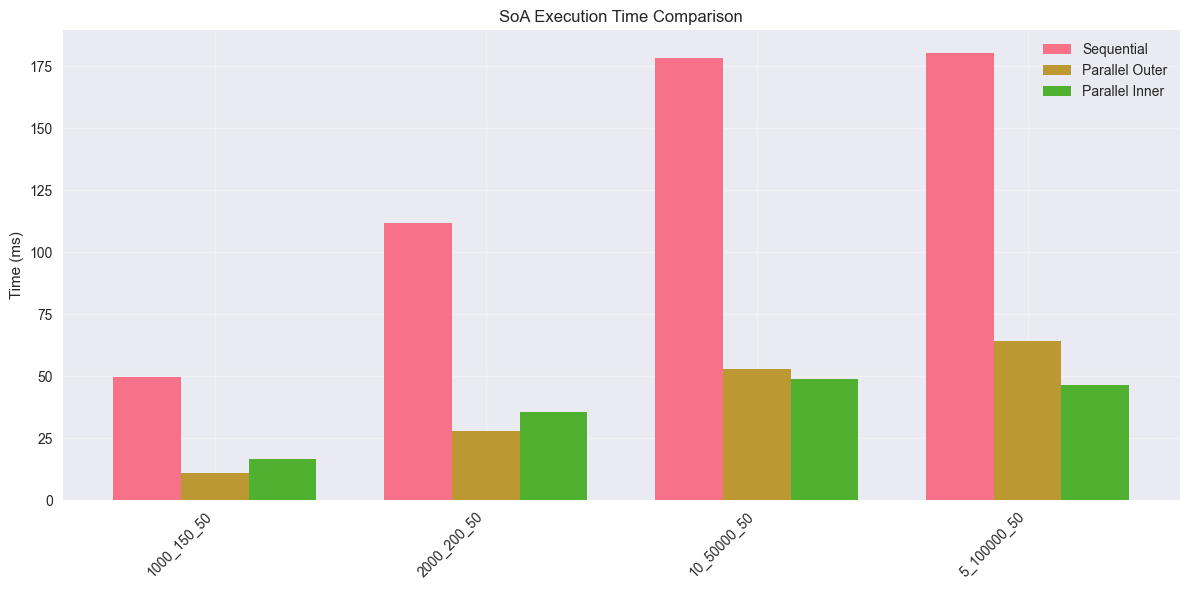

In [6]:

test_names = [r['test_name'] for r in results]
soa_seq = [r['soa']['sequential']['mean_execution_time_ms'] for r in results]
soa_outer = [r['soa']['parallel_outer']['mean_execution_time_ms'] for r in results]
soa_inner = [r['soa']['parallel_inner']['mean_execution_time_ms'] for r in results]
x = np.arange(len(test_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, soa_seq, width, label='Sequential')
ax.bar(x, soa_outer, width, label='Parallel Outer')
ax.bar(x + width, soa_inner, width, label='Parallel Inner')
ax.set_xticks(x)
ax.set_xticklabels(test_names, rotation=45, ha='right')
ax.set_title('SoA Execution Time Comparison')
ax.set_ylabel('Time (ms)')
ax.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 📈 AoS Execution Time Comparison

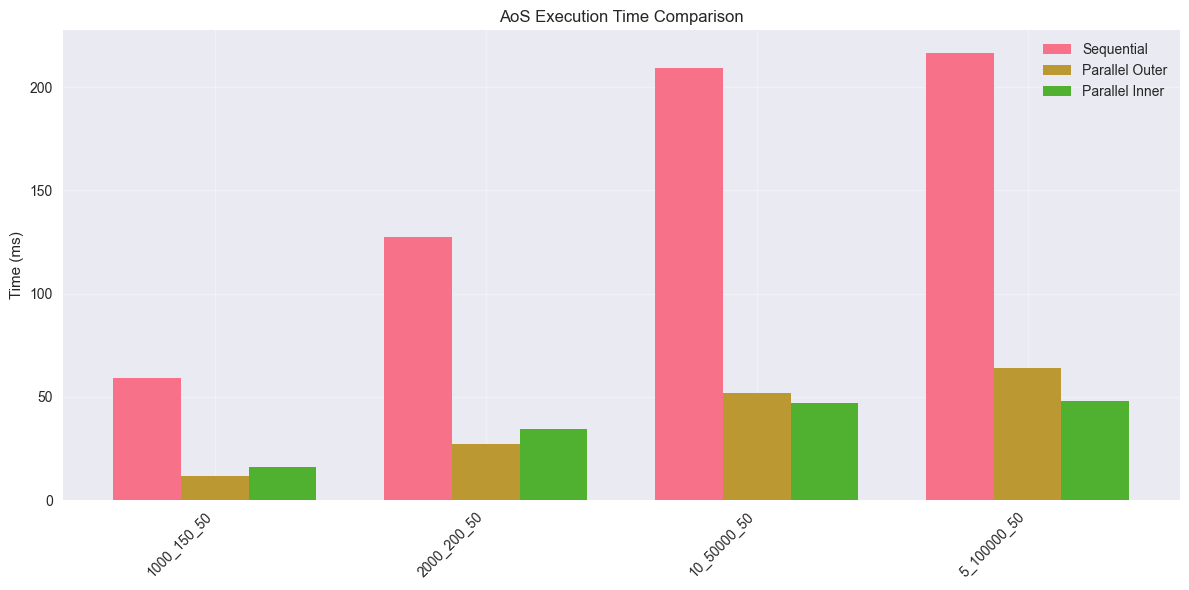

In [7]:

aos_seq = [r['aos']['sequential']['mean_execution_time_ms'] for r in results]
aos_outer = [r['aos']['parallel_outer']['mean_execution_time_ms'] for r in results]
aos_inner = [r['aos']['parallel_inner']['mean_execution_time_ms'] for r in results]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, aos_seq, width, label='Sequential')
ax.bar(x, aos_outer, width, label='Parallel Outer')
ax.bar(x + width, aos_inner, width, label='Parallel Inner')
ax.set_xticks(x)
ax.set_xticklabels(test_names, rotation=45, ha='right')
ax.set_title('AoS Execution Time Comparison')
ax.set_ylabel('Time (ms)')
ax.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 🚀 Speedup Analysis

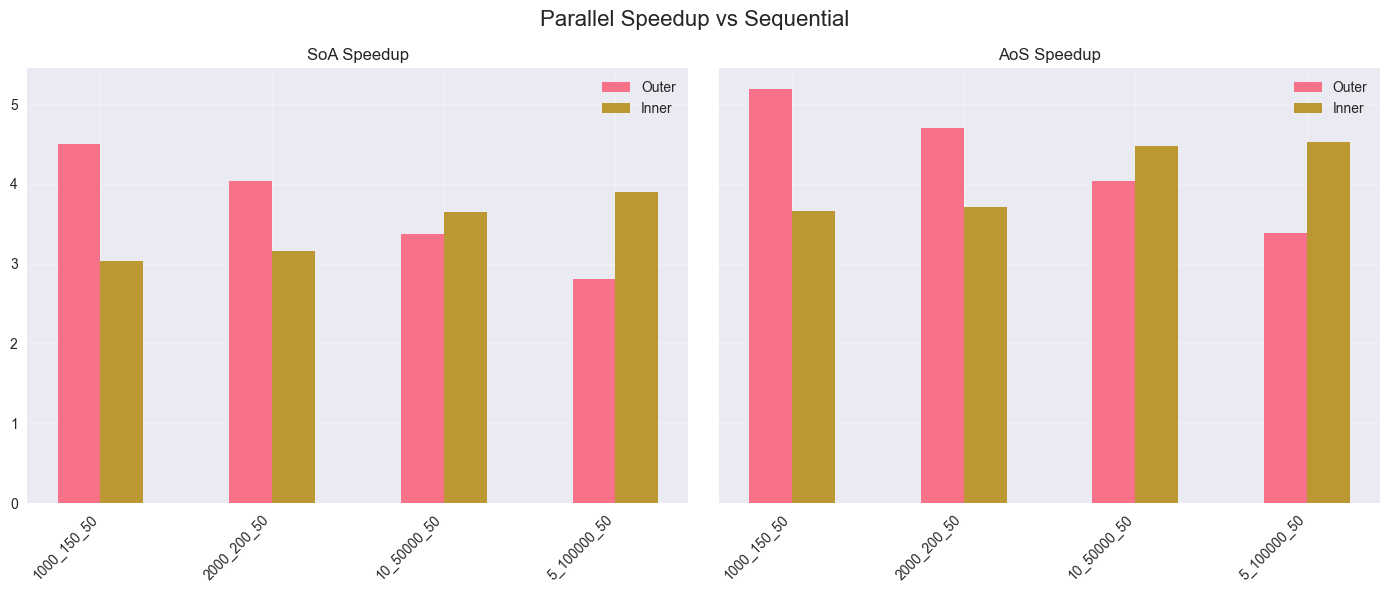

In [8]:

soa_outer_speedup = [r['soa']['parallel_outer']['speedup'] for r in results]
soa_inner_speedup = [r['soa']['parallel_inner']['speedup'] for r in results]
aos_outer_speedup = [r['aos']['parallel_outer']['speedup'] for r in results]
aos_inner_speedup = [r['aos']['parallel_inner']['speedup'] for r in results]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axs[0].bar(x - width/2, soa_outer_speedup, width, label='Outer')
axs[0].bar(x + width/2, soa_inner_speedup, width, label='Inner')
axs[0].set_title('SoA Speedup')
axs[0].set_xticks(x)
axs[0].set_xticklabels(test_names, rotation=45, ha='right')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

axs[1].bar(x - width/2, aos_outer_speedup, width, label='Outer')
axs[1].bar(x + width/2, aos_inner_speedup, width, label='Inner')
axs[1].set_title('AoS Speedup')
axs[1].set_xticks(x)
axs[1].set_xticklabels(test_names, rotation=45, ha='right')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

fig.suptitle('Parallel Speedup vs Sequential', fontsize=16)
plt.tight_layout()
plt.show()
